In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [14]:
raw_data = pd.read_csv('data/Admittance.csv')
raw_data.head()

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No


In [4]:
data = raw_data.copy()

In [5]:
data['Admitted'] = data['Admitted'].map({'Yes':1, 'No':0})
data.head(2)

,SAT,Admitted
0,1363,0
1,1792,1


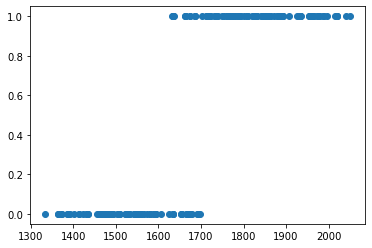

In [6]:
plt.scatter(data.SAT, data.Admitted);

In [7]:
y = data.Admitted
ox = data.SAT
x = sm.add_constant(ox)
result = sm.OLS(y,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Admitted   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     357.5
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           2.98e-43
Time:                        14:41:22   Log-Likelihood:                -24.262
No. Observations:                 168   AIC:                             52.52
Df Residuals:                     166   BIC:                             58.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2519      0.203    -16.038      0.000      -3.652      -2.852
SAT            0.0022      0.000     18.907      0.000       0.002       0.002
==============================================================================
Omnibus:                        7.929   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                3.844
Skew:                           0.090   Prob(JB):                        0.146
Kurtosis:                       2.281   Cond. No.                     1.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

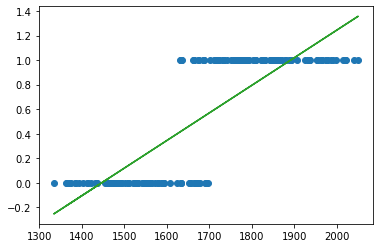

In [8]:
plt.scatter(ox,y, color='C0')
resultY = result.params[0]+ ox*result.params[1]
plt.plot(ox, resultY, color='C2')

In [9]:
result = sm.Logit(y,x).fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Wed, 09 Dec 2020   Pseudo R-squ.:                  0.7992
Time:                        14:41:22   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

y =b0 + b1*x := logit(p) <br>
e(b0 + b1*x)/(1+ e(b0+b1*x)

In [10]:
def logitToY(x, b0, b1):
    return np.array(np.exp(b0+b1*x)/(1+np.exp(b0+b1*x)))

In [11]:
y_sorted = np.sort(logitToY(ox, result.params[0], result.params[1]))
x_sorted = np.sort(np.array(ox))

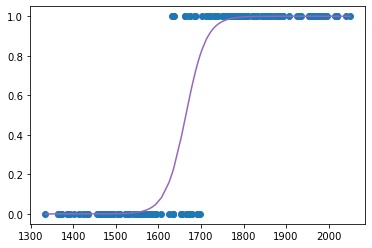

In [12]:
plt.scatter(ox,y, color = 'C0')
plt.plot(x_sorted,y_sorted, color='C4' );